In [1]:
import splitfolders
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from glob import glob
from tensorflow.keras.callbacks import ModelCheckpoint

In [4]:
print(tf.config.list_physical_devices('GPU')[0])

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [5]:
conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [6]:
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-1.9952393, shape=(), dtype=float32)


In [7]:
input_fol="C:/Users/Dell/Downloads/IITD_database only left/IITD_database only left/IITD Database"
output="C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset"

In [8]:
# splitfolders.ratio(input_fol,output,seed=45, ratio=(.7,.2,.1),group_prefix=None)

In [9]:
os.listdir("C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset")

['test', 'train', 'val']

In [10]:
train="C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset/train"
test="C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset/test"
val="C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset/val"

In [11]:
print(train)

C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset/train


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (240, 320),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                seed=1)
val_set = val_datagen.flow_from_directory(val,
                                            target_size = (240, 320),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                         seed=1)
test_set = test_datagen.flow_from_directory(test,
                                            target_size = (240, 320),
                                            batch_size = 16,
                                            class_mode = 'categorical',seed=1)


Found 731 images belonging to 224 classes.
Found 238 images belonging to 224 classes.
Found 224 images belonging to 224 classes.


In [14]:
training_set[1]

(array([[[[7.31668174e-01, 7.31668174e-01, 7.31668174e-01],
          [7.29706526e-01, 7.29706526e-01, 7.29706526e-01],
          [7.38851011e-01, 7.38851011e-01, 7.38851011e-01],
          ...,
          [8.21699619e-01, 8.21699619e-01, 8.21699619e-01],
          [7.66402900e-01, 7.66402900e-01, 7.66402900e-01],
          [7.72966623e-01, 7.72966623e-01, 7.72966623e-01]],
 
         [[7.31610298e-01, 7.31610298e-01, 7.31610298e-01],
          [7.29735494e-01, 7.29735494e-01, 7.29735494e-01],
          [7.38894463e-01, 7.38894463e-01, 7.38894463e-01],
          ...,
          [8.21641684e-01, 8.21641684e-01, 8.21641684e-01],
          [7.66156733e-01, 7.66156733e-01, 7.66156733e-01],
          [7.73068011e-01, 7.73068011e-01, 7.73068011e-01]],
 
         [[7.31552362e-01, 7.31552362e-01, 7.31552362e-01],
          [7.29764462e-01, 7.29764462e-01, 7.29764462e-01],
          [7.38937914e-01, 7.38937914e-01, 7.38937914e-01],
          ...,
          [8.21583748e-01, 8.21583748e-01, 8.2158

In [15]:
len(os.listdir("C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset/train"))

224

In [16]:
img = cv2.imread("C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset/train/001/01_L.bmp")
dimensions = np.array(img)
dimensions.shape

(240, 320, 3)

In [17]:
img_size=(240, 320, 3)

In [18]:
model= Sequential()

In [19]:
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(240, 320, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(60, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(10, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(240, activation='relu'))
model.add(Dense(224, activation='softmax'))

In [20]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 318, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 159, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 157, 60)      34620     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 78, 60)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 76, 32)        17312     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 38, 32)       0

In [22]:
hist=model.fit(training_set, epochs=80,validation_data=val_set)

Epoch 1/80
46/46 [==============================] - 35s 520ms/step - loss: 5.4178 - accuracy: 0.0041 - val_loss: 5.4102 - val_accuracy: 0.0168
Epoch 2/80
46/46 [==============================] - 20s 423ms/step - loss: 5.4113 - accuracy: 0.0068 - val_loss: 5.4082 - val_accuracy: 0.0084
Epoch 3/80
46/46 [==============================] - 17s 372ms/step - loss: 5.4098 - accuracy: 0.0123 - val_loss: 5.3866 - val_accuracy: 0.0084
Epoch 4/80
46/46 [==============================] - 18s 394ms/step - loss: 5.3974 - accuracy: 0.0082 - val_loss: 5.3979 - val_accuracy: 0.0168
Epoch 5/80
46/46 [==============================] - 16s 356ms/step - loss: 5.3732 - accuracy: 0.0246 - val_loss: 5.2278 - val_accuracy: 0.0546
Epoch 6/80
46/46 [==============================] - 18s 381ms/step - loss: 5.0840 - accuracy: 0.0451 - val_loss: 4.3923 - val_accuracy: 0.1555
Epoch 7/80
46/46 [==============================] - 16s 344ms/step - loss: 4.2251 - accuracy: 0.1286 - val_loss: 2.9190 - val_accuracy: 0.2773

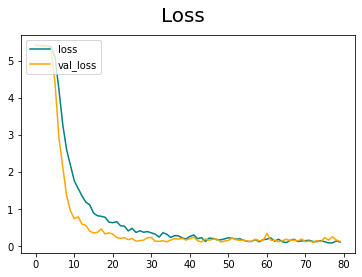

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

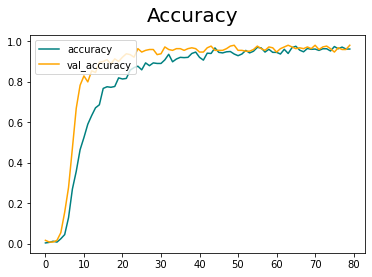

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:

img=cv2.imread("C:/Users/Dell/OneDrive/Desktop/eye/eye_dataset/test/068/03_L.bmp")

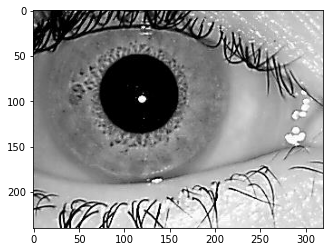

In [41]:
img.shape
plt.imshow(img)
img=img/255
plt.imshow(img)

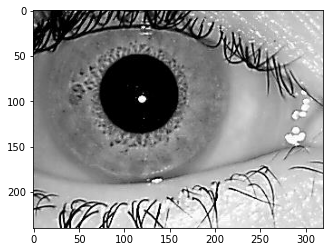

In [42]:
resize=tf.image.resize(img,(240, 320))
plt.imshow(resize)
a=np.expand_dims(resize,0)

In [43]:
y=np.argmax(model.predict(a), axis=1)

1/1 [==============================] - 0s 35ms/step


In [44]:
y

array([67], dtype=int64)

In [45]:
y2=model.predict(test_set[1][0])

1/1 [==============================] - 0s 61ms/step


In [46]:
np.argmax(y2, axis=1)

array([ 41,  54, 157,  64, 173, 188,   7, 147, 128,  42, 214, 125, 160,
        86, 210, 102], dtype=int64)

In [47]:
test_set

In [48]:
len(test_set)

14

In [49]:
test_data=test_set.next()

In [50]:
test_x=test_data[0]

In [51]:
test_y=test_data[1]

In [52]:
model.evaluate(test_set)

14/14 [==============================] - 1s 53ms/step - loss: 0.1786 - accuracy: 0.9777


[0.1785716861486435, 0.9776785969734192]

# Model Accuracy: 97.7%